In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from CAVI_GMM import CAVI_GMM
from sklearn.mixture import BayesianGaussianMixture

In [63]:
Dados = pd.read_csv('Dados\\Geiser_Processado.csv')

Dados.head()

,Duracao,Espera
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


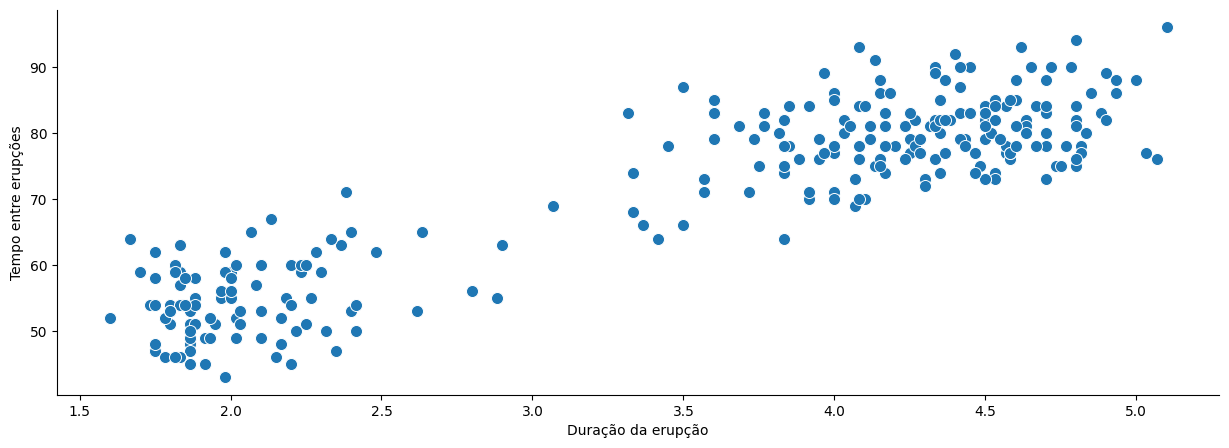

In [64]:
plt.figure(figsize = (15, 5))

Grafico = sns.scatterplot(data = Dados, x = 'Duracao', y = 'Espera', s = 75)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

plt.xlabel('Duração da erupção')

plt.ylabel('Tempo entre erupções')

plt.show()

In [65]:
GMM_1_Grupos = CAVI_GMM(Dados = np.array(Dados), categorias = 1)

GMM_1_Grupos.ajusta_modelo()

In [66]:
GMM_2_Grupos = CAVI_GMM(Dados = np.array(Dados), categorias = 2)

GMM_2_Grupos.ajusta_modelo()

In [67]:
GMM_3_Grupos = CAVI_GMM(Dados = np.array(Dados), categorias = 3)

GMM_3_Grupos.ajusta_modelo()

In [68]:
print('ELBO do modelo com 1 grupos:\n')

print(GMM_1_Grupos.ELBO[-1])

print('\nELBO do modelo com 2 grupos:\n')

print(GMM_2_Grupos.ELBO[-1])

print('\nELBO do modelo com 3 grupos:\n')

print(GMM_3_Grupos.ELBO[-1])

ELBO do modelo com 1 grupos:

-1298.2686231114662

ELBO do modelo com 2 grupos:

-988.2956036840853

ELBO do modelo com 3 grupos:

-757.3338207219984


In [69]:
GMM_Controle = BayesianGaussianMixture(n_components = 2, weight_concentration_prior_type = 'dirichlet_distribution')

GMM_Controle.fit(X = np.array(Dados));

In [70]:
print('ELBO do modelo de controle:\n')

print(GMM_Controle.lower_bound_)

print('\nELBO do modelo de proposto:\n')

print(GMM_2_Grupos.ELBO[-1])

ELBO do modelo de controle:

-681.646635424354

ELBO do modelo de proposto:

-988.2956036840853


In [71]:
print('Médias do modelo de controle:\n')

print(f'{GMM_Controle.means_}\n')

print('Médias do modelo proposto:\n')

print(GMM_2_Grupos.mu)

Médias do modelo de controle:

[[ 2.05493463 54.69096496]
 [ 4.28785755 79.94622363]]

Médias do modelo proposto:

[[ 4.29138012 79.989084  ]
 [ 2.03828682 54.49722583]]


In [72]:
print('Precisão do modelo de controle:\n')

print(f'{GMM_Controle.precisions_}\n')

print('Precisão do modelo proposto:\n')

print(GMM_2_Grupos.Lambda)

Precisão do modelo de controle:

[[[11.57834567 -0.25803212]
  [-0.25803212  0.03207288]]

 [[ 6.75949164 -0.18623924]
  [-0.18623924  0.03230789]]]

Precisão do modelo proposto:

[[[ 6.81362696 -0.18381143]
  [-0.18381143  0.0324555 ]]

 [[13.75818172 -0.22905398]
  [-0.22905398  0.0324064 ]]]


In [73]:
print('Covariância do modelo de controle:\n')

print(f'{GMM_Controle.covariances_}\n')

print('Covariância do modelo proposto:\n')

print(GMM_2_Grupos.Sigma)

Covariância do modelo de controle:

[[[ 0.10523623  0.8466445 ]
  [ 0.8466445  37.99039771]]

 [[ 0.17587325  1.01382374]
  [ 1.01382374 36.79639663]]]

Covariância do modelo proposto:

[[[ 0.17621876  0.99801332]
  [ 0.99801332 36.99492755]]

 [[ 0.08495179  0.60045379]
  [ 0.60045379 36.06639981]]]


In [74]:
print('Probabilidades do modelo de controle:\n')

print(f'{GMM_Controle.weights_}\n')

print('Probabilidades do modelo proposto:\n')

print(GMM_2_Grupos.pi)

Probabilidades do modelo de controle:

[0.35778912 0.64221088]

Probabilidades do modelo proposto:

[0.64281105 0.35718895]


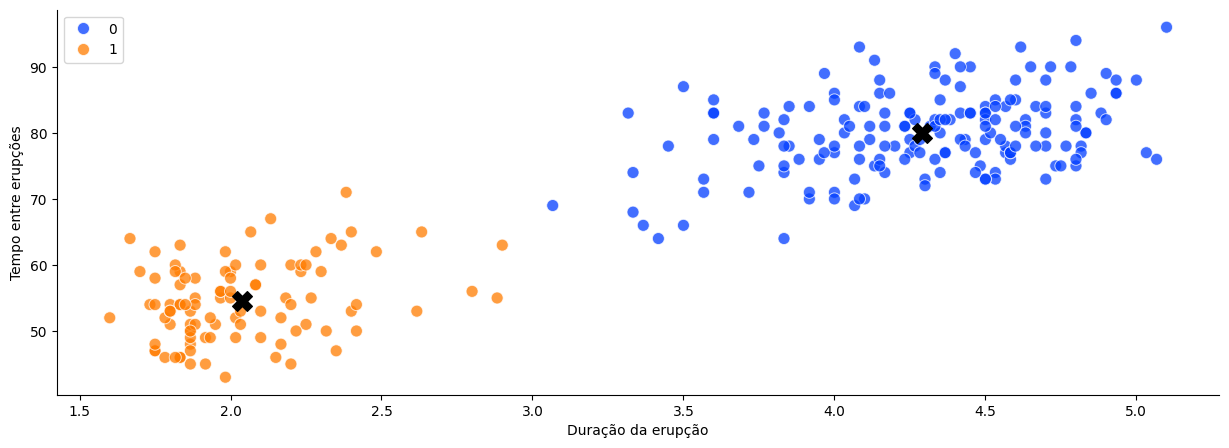

In [75]:
plt.figure(figsize = (15, 5))

Grafico = sns.scatterplot(data = Dados, x = 'Duracao', y = 'Espera', hue = GMM_2_Grupos.Z, s = 75, alpha = 0.75, palette = 'bright')

plt.scatter(x = GMM_2_Grupos.mu[:, 0], y = GMM_2_Grupos.mu[:, 1], color = 'black', marker = 'X', s = 200)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

plt.xlabel('Duração da erupção')

plt.ylabel('Tempo entre erupções')

plt.show()

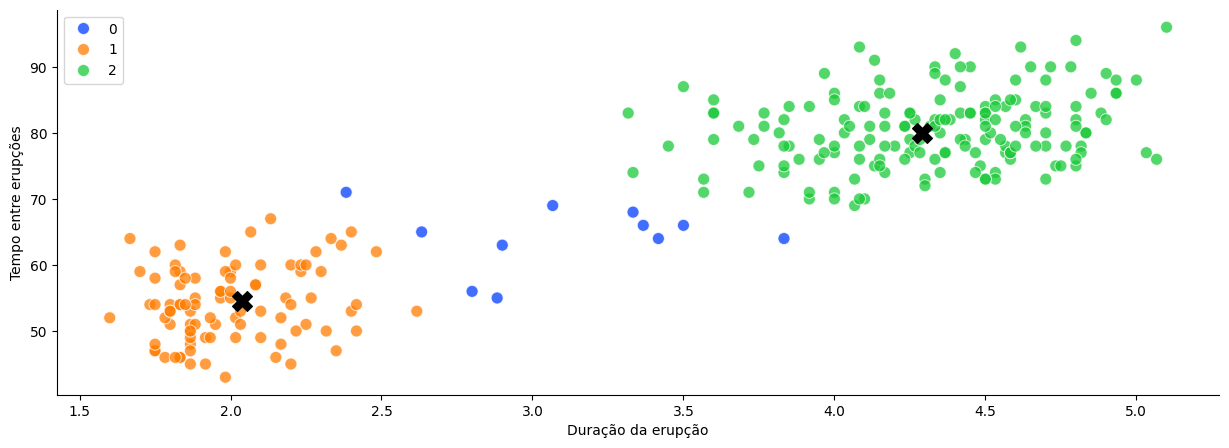

In [76]:
plt.figure(figsize = (15, 5))

Grafico = sns.scatterplot(data = Dados, x = 'Duracao', y = 'Espera', hue = GMM_3_Grupos.Z, s = 75, alpha = 0.75, palette = 'bright')

plt.scatter(x = GMM_2_Grupos.mu[:, 0], y = GMM_2_Grupos.mu[:, 1], color = 'black', marker = 'X', s = 200)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

plt.xlabel('Duração da erupção')

plt.ylabel('Tempo entre erupções')

plt.show()